### מגישים:
בר שירזי - 315536755

עדי כהן- 315006445

לירון זמיר - 209465046

הדר בן שושן - 208737510

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# EDA - Wellbeing & Lifestyle

<div>
<img src="https://idea-events.com/wp-content/uploads/2019/11/wellbeing-01-1.jpg" width="400"/>
</div>


#### The Dataset
מערך נתונים זה מכיל 15,977 תגובות סקר עם 24 מאפיינים המתארים כיצד אנו חיים את חיינו. מערך נתונים זה מכיל נתונים אודות 5 קטגוריות רווחה ואורח חיים ובחרנו להתמקד ב 3 הבאים: 
1. גוף בריא - כושר והרגלים בריאים
2. נפש בריאה - חובקת רגשות חיוביים
3. הישגים - מדידת היכולת להגיע להישגים שלך

[link to the data source](https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data)

In [32]:
url = 'https://raw.githubusercontent.com/adicohen1/Final-Project/main/Data/Wellbeing_and_lifestyle_data_Kaggle.csv'
df = pd.read_csv(url)
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


### Fixing data types

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

 העמודה של התאריך היא מסוג אובייקט נחליף אותה לצורה של תאריך.  

In [34]:
df.Timestamp = pd.to_datetime(df.Timestamp)

עמודת הלחץ היומי מייצגת את רמת הלחץ בין 0-5, היינו מצפים שעמודה זו תיהיה מספרית אך כפי שניתן לראות למעלה היא מסוג אובייקט , כלומר יש ערכים לא תואמים בעמודה זו, ולכן יש לתקן אותה.
נרצה לבדוק איזה ערכים העמודה מכילה ולתקן אותה בהתאם.

In [35]:
df['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

כפי שאנו רואים יש ערך שאינו מספרי - '1/1/00'. נבדוק כמה שורות מהדאטה מכילות את הערך הזה 

In [36]:
df[df['DAILY_STRESS'] == '1/1/00']

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,2018-12-18 10:37:00,3,1/1/00,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,682.6


אנו יכולים לראות שיש רק שורה אחת כזו . הדטאה מכיל כמעט 16,000 שורות והסרת שורה אחת לא תפגע בנתונים.
לכן נסיר אותה מהדאטה שלנו

In [37]:
index_to_drop = df[df['DAILY_STRESS'] == '1/1/00'].index
df.drop(index_to_drop, inplace=True)

לסיום , אנו צריכים להמיר את הסוג של העמודה להיות מספרי

In [38]:
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'])

********************************

#### Replacing string columns to dummies:

In [39]:
df_preprocess = df.copy()

הטור של הגיל הוא גם כן אובייקט, הוא מכיל טווח גילאים ולא את הגיל עצמו. כדי לראות את הקורלציה בין הגיל לתכונות האחרות אנו צריכים להפוך אותו לבינארי


In [40]:
df['AGE'].unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [41]:
df = pd.get_dummies(data=df, columns=['AGE'])

העמודה של המין היא גם אובייקט ,היא מכילה סטרינג של נקבה או זכר . על מנת לראות את הקורלציה של המין ושאר העמודות האחרות או לבצע פעולות מתמטייות על העמודה (כמו הרצת מודל) נמיר אותה להיות בינארית.

In [42]:
df['GENDER'].unique()

array(['Female', 'Male'], dtype=object)

In [43]:
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,GENDER,WORK_LIFE_BALANCE_SCORE,AGE_21 to 35,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,1,4,0,5,Female,609.5,0,1,0,0
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,2,3,2,6,Female,655.6,0,1,0,0
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,2,4,8,3,Female,631.6,0,1,0,0
3,2015-07-07,3,3,10,3,10,7,2,5,2,...,1,5,2,0,Female,622.7,0,0,1,0
4,2015-07-07,5,1,3,3,10,4,2,4,2,...,2,8,1,5,Female,663.9,0,0,1,0


************************************************************************

# מסקנות כלליות:

אחת ההשערות שלנו עבוד הדאטה היא שיש חודשים שבהם הלחץ היומי גובר לעומת חודשים אחרים
נרצה לייצר גרף שבו ניתן לראות את הלחץ היומי הממוצע לפי חודשים:

In [44]:
df['month'] = df.Timestamp.dt.month

<AxesSubplot:xlabel='month'>

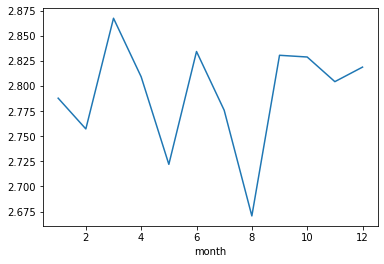

In [45]:
daily_stress_by_month = df[['month', 'DAILY_STRESS']]
daily_stress_by_month.groupby('month').DAILY_STRESS.mean().plot()

### מסקנה:
כפי שניתן לראות מהגרף , בחודשי הקיץ רמת הלחץ יורדת ולקראת חודשי החורף ישנה עליה
מסקנה זאת נובעת לדעתינו כי בחודשי הקיץ בדרך כלל יש פחות לחץ, ילדים בחופש , אנשים נופשים יותר. ולקראת חודשי החורף ישנה עליה ברמת הלחץ כי ילדים פחות בחופשות ומחשיך יותר מוקדם

In [46]:
df['week_day'] = df.Timestamp.dt.day_of_week

<AxesSubplot:xlabel='week_day'>

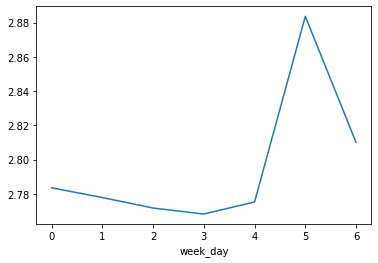

In [47]:
daily_stress_by_weekday = df[['week_day', 'DAILY_STRESS']]
daily_stress_by_weekday.groupby('week_day').DAILY_STRESS.mean().plot()

### מסקנה:
התוצאות קצת סותרות את מה שציפינו, היינו מצפים שרמות הסטרס של אנשים ירדו ככל שמתקרבים לסופש וקיבלנו תוצאות שונות ממה שציפינו. ניתן לראות מהאיור שרמות הסטרס דווקא עולות בסופש. אנחנו חושבים שזה יכול לנבוע אולי מטעות בנתונים עצמם.

**************************************************

נבדוק מי יותר לחוץ גברים או נשים:

In [48]:
df.pivot_table(['DAILY_STRESS'],'GENDER') 

,DAILY_STRESS
GENDER,
Female,2.923717
Male,2.578767


נבדוק אם מתפלג נורמלית:

In [49]:
df['GENDER'].value_counts()

Female    9858
Male      6113
Name: GENDER, dtype: int64

<AxesSubplot:ylabel='GENDER'>

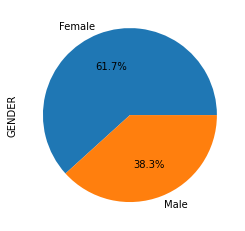

In [50]:
df['GENDER'].value_counts().plot.pie(autopct='%1.1f%%')

ניתן לראות מהטבלה שנשים באופן כללי יותר לחוצות מגברים.
אבל עשינו ניתוח נוסף כדי לראות אם כמות הגברים והנשים שענו על הסקר שווה.
ניתן לראות שענו על הסקר יותר נשים מגברים ולכן קשה להסיק מסקנה - לא מתפלג נורמלית.

In [51]:
df_preprocess.pivot_table(['DAILY_STRESS'],'AGE')

,DAILY_STRESS
AGE,
21 to 35,2.814803
36 to 50,2.894307
51 or more,2.628319
Less than 20,2.755910


<AxesSubplot:ylabel='AGE'>

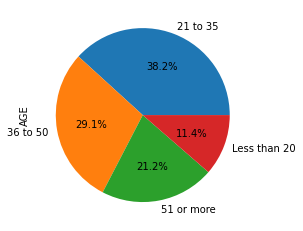

In [52]:
df_preprocess['AGE'].value_counts().plot.cou(autopct='%1.1f%%')

## מסקנה:
ניתן לראות שמגיל 20-51 רמת הלחץ עולה , ניתן להסיק זאת כי בגילאים האלה אנו יותר עסוקים בלבנות את העתיד שלנו מבחינה כלכלית, משפחתית, ויש יותר עומס מאשר בגיל 51 ומעלה. בגיל 51+ יש קצת פחות לחץ ועומס כי אנשים כבר יותר מסודרים מבחינה כלכלית ומשפחתית ונמצאים לקראת הפנסיה.
גם כאן ניסינו לראות האם הדאטה מתפלג נורמלית כדי להבין אם המסקנה היא חד משמעית ושוב ראינו שההתפגות לא נורמלית ושיותר אנשים מגילאי 20 עד 50 ענו על הסקר

**************************

### גוף בריא:

נרצה לבדוק מה הופך אדם לבריא בגופו.
אנו מאמינים שמסת הגוף היא מדד מספיק טוב כדי לבדוק האם הגוף בריא. 
בסקר אנשים שענו על מסת הגוף שלהם חולקו לשתי קטגוריות- מסת גוף שגדולה מ25 ומסת גוף שקטנה מ25.
נרצה לבדוק איזה מאפיינים משפיעים על מסת גוף בריאה (מתחת ל25)

In [53]:
df.corr().abs()['BMI_RANGE'].sort_values()

LIVE_VISION                0.000088
TIME_FOR_PASSION           0.006237
week_day                   0.010327
month                      0.010815
SUFFICIENT_INCOME          0.011863
PERSONAL_AWARDS            0.019007
ACHIEVEMENT                0.019699
SOCIAL_NETWORK             0.019843
CORE_CIRCLE                0.025965
FLOW                       0.026761
LOST_VACATION              0.036683
SUPPORTING_OTHERS          0.038558
DAILY_SHOUTING             0.060470
TODO_COMPLETED             0.061508
DONATION                   0.064543
WEEKLY_MEDITATION          0.078189
DAILY_STRESS               0.083110
FRUITS_VEGGIES             0.092976
AGE_36 to 50               0.097905
SLEEP_HOURS                0.098156
AGE_21 to 35               0.104932
PLACES_VISITED             0.108054
AGE_51 or more             0.120770
DAILY_STEPS                0.131465
AGE_Less than 20           0.134983
WORK_LIFE_BALANCE_SCORE    0.252026
BMI_RANGE                  1.000000
Name: BMI_RANGE, dtype: floa

#### מסקנות:
רצינו לראות מי הם הפיצ'רים שהכי מקורלצים למסת גוף.
1. איזון בין עבודה לחיים- אנחנו יכולים להבין שככל שיש איזון יותר נכון בין עבודה לחיים לאנשים יש יותר זמן להשקיע בגופם גם מבחינת תזונה נכונה וגם מבחינה פעילות גופנים ושעות שינה וטיפוח הגוף.
2. גיל פחות מ20- ניתן להבין זאת כי לילדים לרוב יש גוף בריא הם לא צוברים הרבה שומן ויש להם סדר יום ולרוב קל להם יותר להשקיע בגופם.
3. כמות הצעדים היומית - ככל שאדם עושה יותר צעדים כך גופו בריא יותר.

אנחנו מאמינים שמסת הגוף תהיה מושפעת בעיקר ממאפיינים כמו תזונה נכונה ופעילות גופנית בנוסף יש פיצ'ר של כמות שעות השינה ואנו מאמינים שהוא גם משפיע על גוף בריא. 

<AxesSubplot:xlabel='WEEKLY_MEDITATION'>

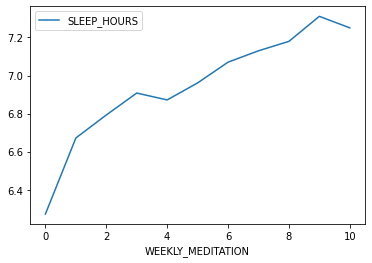

In [54]:
df.pivot_table(['SLEEP_HOURS'],'WEEKLY_MEDITATION').plot()

הבחנה: ביצוע מדיטציה באופון קבוע עוזר לשינה ארוכה יותר.
 מדיטציה מסייעת לשחרר את השרירים-כשאנו נמצאים במתח או לחץ השרירים שלנו מכווצים ומתוחים מאוד,שינה מתרחשת רק כשאר הגוף רפוי ולכן אנחנו מסיקים שמדיטציה תורמת לאיכות השינה

In [55]:
df.pivot_table(['FRUITS_VEGGIES', 'DAILY_STEPS', 'SLEEP_HOURS'],'BMI_RANGE')

,DAILY_STEPS,FRUITS_VEGGIES,SLEEP_HOURS
BMI_RANGE,,,
1,6.020822,3.034633,7.141188
2,5.248246,2.761970,6.901952


C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='SLEEP_HOURS'>

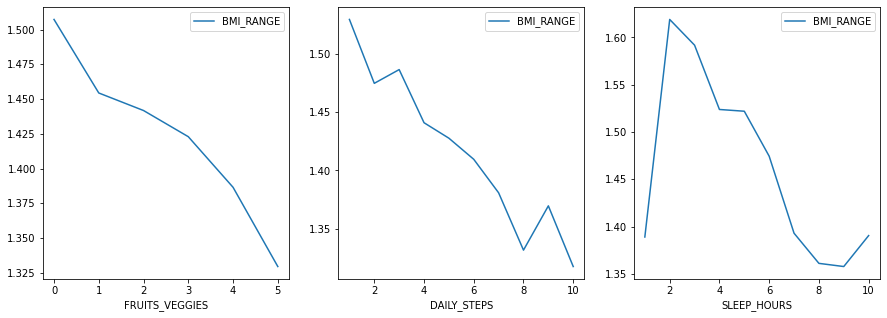

In [56]:
f,ax = plt.subplots(1,3, figsize=(15,5))
df_preprocess.pivot_table(['BMI_RANGE'],'FRUITS_VEGGIES').plot(ax=ax[0])
df_preprocess.pivot_table(['BMI_RANGE'],'DAILY_STEPS').plot(ax=ax[1])
df_preprocess.pivot_table(['BMI_RANGE'],'SLEEP_HOURS').plot(ax=ax[2])

<AxesSubplot:xlabel='SLEEP_HOURS', ylabel='count'>

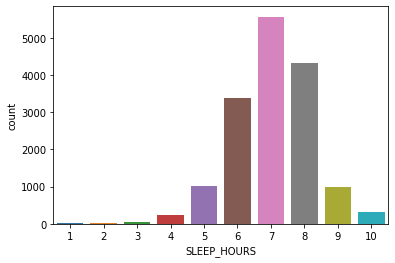

In [57]:
sns.countplot(x="SLEEP_HOURS", data=df_preprocess)

ככל שאוכלים יותר ירקות ופירות (תזונה נכונה) הגוף יותר בריא , מסת גוף יותר תקינה מתחת ל25
כנל לגבי כמות צעדים ככל שיש יותר צעדים ביום מסת הגוף תקינה יותר
כנל לגבי שעות שינה. אמנם יש עליה בגרף בין 1 ל-2 שעות שינה אבל זה קורה לדעתינו בגלל שכמות האנשים שהגיבו לסקר ששעות השינה שלהם עומדת על 1-2 היא קטנה ביחס לשעות השינה של שאר האנשים. 

********************************

### נפש בריאה:

In [58]:
df.corr().abs()['DAILY_STRESS'].sort_values()

month                      0.003221
AGE_Less than 20           0.009377
AGE_21 to 35               0.013299
week_day                   0.013315
SOCIAL_NETWORK             0.020930
SUPPORTING_OTHERS          0.029852
DONATION                   0.037721
PERSONAL_AWARDS            0.042535
AGE_36 to 50               0.048122
AGE_51 or more             0.062001
DAILY_STEPS                0.065511
BMI_RANGE                  0.083110
FRUITS_VEGGIES             0.094535
ACHIEVEMENT                0.110943
CORE_CIRCLE                0.120238
FLOW                       0.129903
LIVE_VISION                0.134155
PLACES_VISITED             0.134857
SUFFICIENT_INCOME          0.144573
SLEEP_HOURS                0.157037
TIME_FOR_PASSION           0.158141
TODO_COMPLETED             0.163727
LOST_VACATION              0.196953
WEEKLY_MEDITATION          0.218660
DAILY_SHOUTING             0.302669
WORK_LIFE_BALANCE_SCORE    0.365399
DAILY_STRESS               1.000000
Name: DAILY_STRESS, dtype: f

#### מסקנות:
רצינו לראות מי הם הפיצ'רים שהכי מקורלצים לרמת הלחץ היומית:.
1. איזון בין עבודה לחיים- אנחנו יכולים להבין שככל שיש איזון יותר נכון בין עבודה לחיים אנשים יותר רגועים.
2. כמות הפעמים שלאדם יוצא לצעוק ביום- ניתן להבין שככל שאדם צועק יותר כך הוא יותר לחוץ.
3. מדיטציה שבועית- ככל שאדם עושה יותר מדיטציות כך יש יותר סבירות שהוא יהיה רגוע ומפוקס.

אנחנו מאמינים שהמאפיינים שהכי יכולים להשפיע על רמות הלחץ היומיות אצל אנשים הם כמות הפעמים שהם צועקים או מתעצבנים ביום, מדיטציה יכול להשפיע על רמת הסטרס וגם ככל שאדם לוקח יותר ימי חופשה סביר להניח שהוא אדם יותר רגוע.

In [59]:
df_preprocess.pivot_table(['DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'LOST_VACATION'],'DAILY_STRESS')

,DAILY_SHOUTING,LOST_VACATION,WEEKLY_MEDITATION
DAILY_STRESS,,,
0,1.465976,1.761834,7.849112
1,1.843826,1.946731,7.097256
2,2.473144,2.485471,6.515409
3,3.041610,2.865166,6.182128
4,3.518919,3.542230,5.544257
5,4.401559,4.250487,5.295322


C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:xlabel='WEEKLY_MEDITATION'>

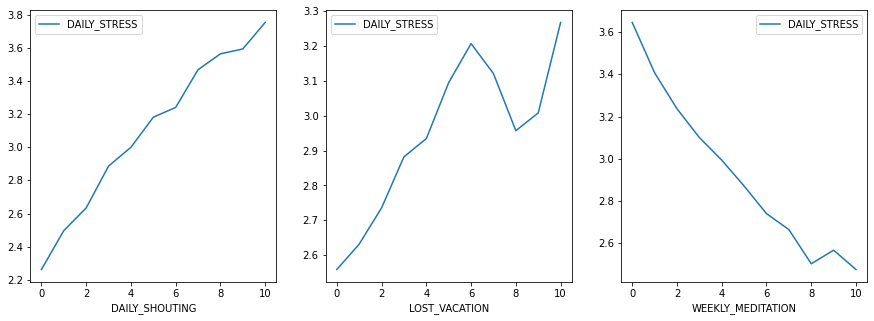

In [60]:
f,ax = plt.subplots(1,3, figsize=(15,5))
df_preprocess.pivot_table(['DAILY_STRESS'],'DAILY_SHOUTING').plot(ax=ax[0])
df_preprocess.pivot_table(['DAILY_STRESS'],'LOST_VACATION').plot(ax=ax[1])
df_preprocess.pivot_table(['DAILY_STRESS'],'WEEKLY_MEDITATION').plot(ax=ax[2])

<AxesSubplot:xlabel='LOST_VACATION', ylabel='count'>

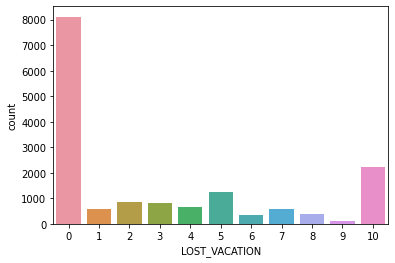

In [62]:
sns.countplot(x="LOST_VACATION", data=df_preprocess)

ניתן לראות שיש 3 מרכיבים שמשפיעים על הלחץ.
1. ככל שאנו צועקים יותר רמת הלחץ עולה
2.  ככל שאנו מפסידים יותר ימי חופשה רמת הלחץ עולה ,ניתן לראות בגרף שיש ירידה בין 6-9 , זאת מכיוון שיש פחות נתונים בדאטה
3. ככל שעושים יותר מדיטציה רמת הלחץ יורדת

## Building a model from the data

אנו רוצים לנבא את ההשיגים בהתאם לפיצ'רים הבאים שלדעתינו הם הכי שמפיעים על המודל

In [63]:
X = df[['TODO_COMPLETED', 'FLOW', 'LIVE_VISION', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION']]
y = df['ACHIEVEMENT']
X.head(2)

,TODO_COMPLETED,FLOW,LIVE_VISION,PERSONAL_AWARDS,TIME_FOR_PASSION
0,6,4,0,4,0
1,5,2,5,3,2


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 
y_test.head()

10731     0
476       1
4291      4
1402      6
6497     10
Name: ACHIEVEMENT, dtype: int64

In [65]:
model = RandomForestClassifier(max_depth=15, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [66]:
pred = model.predict(X_test)
preds_df = pd.DataFrame(columns = ['ACHIEVEMENT', 'predictions'])
preds_df['ACHIEVEMENT'] = y_test
preds_df = preds_df.reset_index(drop=True)
preds_df['predictions'] = pd.Series(pred)
preds_df

,ACHIEVEMENT,predictions
0,0,2
1,1,2
2,4,2
3,6,3
4,10,10
...,...,...
4787,4,1
4788,5,5
4789,3,3
4790,3,3


In [67]:
acc = accuracy_score(preds_df['ACHIEVEMENT'], preds_df['predictions'])

In [68]:
acc

0.22078464106844742

התוצאה שקיבלנו אמנם לא נראית מאוד גבוהה. האם היא טובה יותר ממישהו שמנחש את התוצאות בצורה רנדומלית?
בואו נבדוק:
אם מישהו היה צריך לנחש קלאס באופן רנדומלי הוא היה מנחש אחד מתוך ה11 תוצאות האפשריות.
כלומר 1 ל-11 שזה בעצם 0.09
כלומר אם מישהו היה צריך לנחש באופן אקראי את כמות ההישגים של אדם מסויים הסיכוי שהוא היה מצליח הוא 0.09 שזה 9%.
התוצאה שלנו גבוהה ב0.13 , כ-13% יותר ממישהו שמנחש באופן אקראי, ולכן אנחנו יכולים להגיד שהפיצ'רים שחשבנו שמשפיעים אכן משפיעים על ההשיגים של אדם מסויים.

בחרנו במודל יער מכיוון שזהו מודל חזק יותר ממודל של עץ פשוט. הוא משתמש בהרבה עצים כדי לקבוע את התוצאה הסופית.

### Summery:
הדאטה שבחרנו עוסק באיכות וסגנון חיים והוא מתבסס על סקר שנערך במשך הרבה שנים ומכיל הרבה משתתפים. 
ישנן 5 קטגוריות שאליהם הדאטה מתייחס בהקשר של איכות וסגנון חיים ואנחנו בחרנו להתמקד ב3 מתוכם:
יש משפט שאומר נפש בריאה בגוף בריא - אנחנו בדקנו מה הם המאפיינים המשפיעים עבור גוף בריא על סמך מסת הגוף והמסקנה שלנו היא שחשוב להתאמן, לאכול בריא (הרבה פירות וירקות) ולישון טוב.
בנוסף בדקנו מה הם המאפיינים המשפיעים עבור נפש בריאה - המאפיינים שמשפיעים על רמת הלחץ היומי הם ההתנהלות היומית מבחינת הצעקות, ניצול ימי החופשה שיש לאדם וביצוע מדיטציה שכידוע מאוד משפיעה על רמת הלחץ.
דבר נוסף שראינו הוא שדווקא בקיץ יש ירידה ברמוות הלחץ של אנשים כי כנראה שיוצאים לחופשה וגם יש פחות פקקים בכביש והלחץ באופן כללי יורד.

<div>
<img src="https://i0.wp.com/chartcons.com/wp-content/uploads/thanks-for-listening.jpg?w=696&ssl=1" width="400"/>
</div>